_Kristian M.P. Dashnaw, Software Engineering student at VIA University College, Horsens._


# __Assignment 1 - ADS Fall 2024__

The objective of this assignment is to implement the BucketSort algorithm in Python, and analyse its runtime performance under different scenarios. Specifically, you will demonstrate how the runtime of BucketSort is influenced by the assumption of evenly distributed numbers in the input array.

# __Task 1:__
Implement the BucketSort algorithm in python. Your implementation should take an array of integers as input and sort them using BucketSort. Note that to use a linked list in python, you can write: 


    from collections import duque as linked_list

To solve task 1, we must use the following pseudo code description, as referenced in the ADS1 slides (ie. the one that will be referred to at the exam):

    Algorithm: BucketSort(list, k):
      Input : A List list containing a number of items to sort, and a contant k which should be equal to the list size.
      Output: A sorted version of the initial list.
      
      buckets = array of k empty lists
      M = maximum value in list
      for i = 0 to length(list):
        insert list[i] into buckets[floor(k*list[i]/(M+1))]
      for j = 0 to k:
        InsertionSort(buckets[j])
      return concatenation of buckets
  _source: ADS1 Session 5, PowerPoint slide #5_
    
    Algorithm: InsertionSort(A):
      Input : An array A of n comparable elements
      Output: The array A with elements rearranged in nondecreasing order
      
      for k from 1 to (n-1) do
        Insert A[k] at its proper location within A[0], A[1], ..., A[k].
  _source: Data Structures in Python p. 214_
      

      


__Implementing the above in python results in the following code:__

In [1]:
# InsertionSort algorithm in Python, Source: Data Structures in Python p. 214 from pensum.
def insertion_sort(list_of_values):
    """Sort list of comparable elements into non-decreasing order."""
    for k in range(1, len(list_of_values)):             # from 1 to (n-1)
        cur = list_of_values[k]                         # current element to be inserted.
        j = k                                           # find correct index j for current
        while j > 0 and list_of_values[j - 1] > cur:    # element A[j-1] must be after current.
            list_of_values[j] = list_of_values[j - 1]
            j -= 1
        list_of_values[j] = cur                         # cur is now in the right place.

In [2]:
# BucketSort algorithm in Python:
from collections import deque as linked_list
from math import floor

""" First sort a list of values into a number of arrays of 'k' length using BucketSort. Then sort each shorter array with InsertionSort, before concatenating all the shorter buckets, resulting in a ordered list of values. """
def bucket_sort(list_of_values, k):   
    buckets = [linked_list() for _ in range(k)]     # an array to contain k number of linked_lists, which each will contain the list_of_value entries.
    m = 0                                           # Contains the maximum value in the list_of_values. Initialized to zero.
    
    # Establish what the maximum value in the list is:
    for i in range (0, len(list_of_values)):
        if list_of_values[i] > m:                   # For each element in the list_of_values check if that value is larger than the current m
            m = list_of_values[i]
            
    # Check that M is not exactly equal to -1, since that will provide a null-divisor error. If so, adjust so M is close to -1 without being -1:
    if m == -1:
        m = -0.999999999999999999999999999999999999999999999999999999999999999999999999
        
    # For each value in the list, insert the values in to bucket linked_list:
    for i in range(0, len(list_of_values)):
        buckets[floor(k*list_of_values[i]/(m+1))].append(list_of_values[i]) # Calculate insertion index
        
    # Perform insertion sort on all the linked lists (which are significantly shorter than the original linked_List:
    sorted_list = []                                # Contains the final sorted results.
    for j in range(0, k):
        insertion_sort(buckets[j])                  # Sorts each bucket with InsertionSort.
        sorted_list.extend(buckets[j])              # Concatenates the current bucket inside this loop, to improve performance.
        
    return sorted_list

In order to test the validity of the above sorting algorithm, we set up 2 tests with un-ordered numbers.

__Test 1:__ Evenly distributed numbers (e.g. [5, 1, 4, 2, 3, 9, 6, 7, 8, 0])

__Test 2:__ Non-evenly distributed numbers (e.g. [10000000, 1, 4, 2, 3, 8, 7, 0, 5, 9, 6])

In [3]:
# Test1: Evenly distributed numbers (e.g. [5, 1, 4, 2, 3, 9, 6, 7, 8, 0])
list_of_values_test1 = [5, 1, 4, 2, 3, 9, 6, 7, 8, 0]
print ("Test 1:")
print ("Unordered list is                       : " + str(list_of_values_test1))
print ("Ordered list with BucketSort [k=10] is  : " + str(bucket_sort(list_of_values_test1, 10)))
print ("Expected result is 10 numbers starting af 0 and ending at 10")

# Test2: Non-evenly distributed numbers (e.g. [10000000, 1, 4, 2, 3, 8, 7, 0, 5, 9, 6])
list_of_values_test2 = [50000000, 154, 4, 42, 333, 1, 6, 0, 884613794321, 14647120]
print ("\nTest 2:")
print ("Unordered list is                       : " + str(list_of_values_test2))
print ("Ordered list with BucketSort [k=10] is  : " + str(bucket_sort(list_of_values_test2, 10)))
print ("Expected result is 10 numbers starting af 0 and ending at 884613794321")

Test 1:
Unordered list is                       : [5, 1, 4, 2, 3, 9, 6, 7, 8, 0]
Ordered list with BucketSort [k=10] is  : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Expected result is 10 numbers starting af 0 and ending at 10

Test 2:
Unordered list is                       : [50000000, 154, 4, 42, 333, 1, 6, 0, 884613794321, 14647120]
Ordered list with BucketSort [k=10] is  : [0, 1, 4, 6, 42, 154, 333, 14647120, 50000000, 884613794321]
Expected result is 10 numbers starting af 0 and ending at 884613794321


# __Task 2__ 
Analyse the runtime of your BucketSort implementation under two different scenarios:
    Scenario 1: Input numbers are evenly distributed (e.g. [5,1,4,2,3] for n = 5)
    Scenario 2: Input numbers are not evenly distributed (e.g. [10000000,1,4,2,3] for n = 5).
    
Specifically, generate test cases for both scenarios with varying sizes of input arrays (n), record the runtime of your BucketSort implementation for each test case and plot a graph that illustrates the runtime of BucketSort as a function of the size of the input array (n) for both scenarios.


__Testing principle:__

To properly test the methods runtime, a test generation algorithm will be written.
This algorithm will generate a number of valid numbers between 0 and an input_size defined by the user, as well as providing the option for setting a max_value that all generated numbers must be below.

In [14]:
#Number Sequence generator: Generate a number sequence with random placement of numbers from 0 to input_size, with a defined max_value.
from numpy.random import random

def generate_random_sequence(max_value, input_size):
    valid_numbers = [0] * input_size
    
    # Generate a sequence of valid numbers to choose from. if input_size is less than max_value, then just fill with evenly distributed values. Otherwise, fill with unevenly distributed values.
    if max_value <= input_size:
        for i in range(0, max_value):
            valid_numbers[i] = i
    else:
        min_1_very_uneven_value_set = False
        for i in range(0, input_size):
            # Ensure that at least 1 generated number, and about 10% in the sequence is outside the evenly-distributed number sequence.
            if 100*random() >= 90 or (i > input_size * 0.75 and not min_1_very_uneven_value_set): 
                valid_numbers[i] = input_size + floor(max_value*random())
                min_1_very_uneven_value_set = True
            else:
                # for 90% of the values, just fill with numbers that are below input_size (so these are evenly distributed).
                valid_numbers[i] = i
    
    # Fill an array with 'input_size' amount of numbers taken from the valid_numbers array.
    number_array = []
    while len(number_array) < input_size:                   # Run until input_size amount of numbers have been selected.
        random_index = floor(len(valid_numbers)*random())
        number_array.append(valid_numbers[random_index])    # Take a number from a randomly chosen location, and remove it from the array.
        valid_numbers.remove(valid_numbers[random_index])   # Remove the chosen number from the valid_numbers array, reducing the array size.
    
    return number_array

#print ("Generated sequence is:\n", generate_random_sequence(100, 100)) # DEBUG

In [15]:
from time import time

# Shared settings:
max_input_size = 5000

# Test 1, 
# Fill a hashmap with time measured when BucketSorting a sequence of numbers between input_size = 1 to input_size = max_input_size.
# In test 1, the maximum value in each number sequence CANNOT be larger than the size of each number sequence!
evenly_distributed_hashmap = dict()                         # hashmap containing (key=input_size, value=time_spent_doing_bucket_sort)

for i in range(max_input_size):
    numbers = generate_random_sequence(i,i)                 # Generate sequence of numbers for this input_size
    start_time = time()                                     # Begin measuring time
    sortedNumbers = bucket_sort(numbers, i)                 # BucketSort the numbers
    end_time = time()                                       # Stop measuring time
    evenly_distributed_hashmap[i] = end_time - start_time   # Save the time spent processing this
    # print ("Time with i={} is : {}".format(i, end_time - start_time)) #DEBUG
    
    
# Test 2, 
# Fill a hashmap with time measured when BucketSorting a sequence of numbers between input_size = 1 and a maximum possible value of 10.000.000.
# In test 2, the maximum value in each number sequence CAN be larger than the size of each number sequence!
un_evenly_distributed_hashmap = dict()                         # hashmap containing (key=input_size, value=time_spent_doing_bucket_sort)

for i in range(max_input_size):
    numbers = generate_random_sequence(10000000,i)              # Generate sequence of numbers for this input_size, with upper bound of possible values being 10.000.000.
    # print ("Sequence generated is\n: ", numbers)              # DEBUG
    start_time = time()                                         # Begin measuring time
    sortedNumbers = bucket_sort(numbers, i)                     # BucketSort the numbers
    end_time = time()                                           # Stop measuring time
    un_evenly_distributed_hashmap[i] = end_time - start_time    # Save the time spent processing this
    # print ("Time with i={} is : {}".format(i, end_time - start_time)) #DEBUG


Based on the above 2 tests (evenly distributed and unevenly distributed), this graph can be plotted with calculation times correlated against input_size.

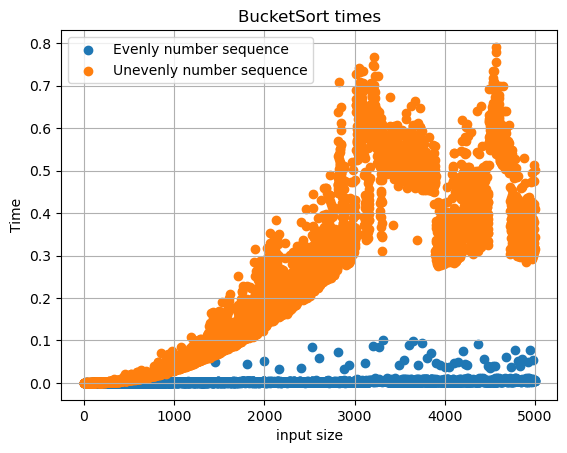

In [16]:
import matplotlib.pyplot as plt

# Display times on a graph

# Define the x and y-axis:
x1_axis = evenly_distributed_hashmap.keys()
y1_axis = evenly_distributed_hashmap.values()

x2_axis = un_evenly_distributed_hashmap.keys()
y2_axis = un_evenly_distributed_hashmap.values()

# Set up
plt.scatter(x1_axis, y1_axis, label = "Evenly number sequence")
plt.scatter(x2_axis, y2_axis, label = "Unevenly number sequence")
plt.title("BucketSort times")
plt.xlabel("input size")
plt.ylabel("Time")

plt.legend()
plt.grid(True)
plt.show()

# __Task 3__
Provide a clear explanation of the trends observed in the graph

In [ ]:
#Some code